Задание 1
Напишите функцию, которая классифицирует фильмы из материалов занятия по следующим правилам:
	- оценка 2 и меньше - низкий рейтинг
	- оценка 4 и меньше - средний рейтинг
	- оценка 4.5 и 5 - высокий рейтинг

Результат классификации запишите в столбец class

In [89]:
import pandas as pd

def rate_film(a):
    """ Присваивает категорию рейтинга на основании его значения """
    rat = 'низкий рейтинг'
    if a <= 2:
        rat = 'низкий рейтинг'
    elif a <= 4 and a > 2:
        rat = 'средний рейтинг'
    elif a == 4.5 or a == 5:
        rat = 'высокий рейтинг'
    return rat


In [90]:
ratings=pd.read_csv('C:/Users/User/Documents/My Python Netology/7 Pandas Функции и группировки/Python_7_pandas_functions_groupby/Python_7_pandas_functions_groupby/ml-latest-small/ratings.csv')

ratings.head(3)

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182


In [91]:
ratings['class'] = ratings['rating'].apply(rate_film)

ratings.head(10)

,userId,movieId,rating,timestamp,class
0,1,31,2.5,1260759144,средний рейтинг
1,1,1029,3.0,1260759179,средний рейтинг
2,1,1061,3.0,1260759182,средний рейтинг
3,1,1129,2.0,1260759185,низкий рейтинг
4,1,1172,4.0,1260759205,средний рейтинг
5,1,1263,2.0,1260759151,низкий рейтинг
6,1,1287,2.0,1260759187,низкий рейтинг
7,1,1293,2.0,1260759148,низкий рейтинг
8,1,1339,3.5,1260759125,средний рейтинг
9,1,1343,2.0,1260759131,низкий рейтинг


Задание 2
Используем файл keywords.csv.

Необходимо написать гео-классификатор, который каждой строке сможет выставить географическую принадлежность определенному региону. Т. е. если поисковый запрос содержит название города региона, то в столбце 'region' пишется название этого региона. Если поисковый запрос не содержит названия города, то ставим 'undefined'.

Правила распределения по регионам Центр, Северо-Запад и Дальний Восток:

geo_data = {

    'Центр': ['москва', 'тула', 'ярославль'],

    'Северо-Запад': ['петербург', 'псков', 'мурманск'],

    'Дальний Восток': ['владивосток', 'сахалин', 'хабаровск']

}

Результат классификации запишите в отдельный столбец region.

In [92]:
import pandas as pd

kw = pd.read_csv('C:/Users/User/Documents/My Python Netology/7 Pandas Функции и группировки/Python_7_pandas_functions_groupby/Python_7_pandas_functions_groupby/keywords.csv')

kw.head(3)

,keyword,shows
0,вк,64292779
1,одноклассники,63810309
2,порно,41747114


In [93]:
geo_data = {

    'Центр': ['москва', 'тула', 'ярославль'],

    'Северо-Запад': ['петербург', 'псков', 'мурманск'],

    'Дальний Восток': ['владивосток', 'сахалин', 'хабаровск']

}

In [94]:
def geo_classifier(a):
    """ присваивает Регион на основании наличия названия города в строке """
    for region in geo_data.keys():
        for city in geo_data.get(region):
            if city in a:
                return region
            else:
                continue
    return 'undefined'

In [95]:
print (geo_classifier('петербург')) #проверяем функцию

Северо-Запад


In [96]:
kw['region'] = kw['keyword'].apply(geo_classifier)

kw_region = kw[kw['region'] != 'undefined']
kw_region.head()

,keyword,shows,region
127,авито москва,979292,Центр
370,авито ру санкт петербург,425134,Северо-Запад
564,погода в санкт петербурге,292489,Северо-Запад
849,авито ярославль,209581,Центр
1063,фарпост владивосток,176951,Дальний Восток


In [97]:
kw_no_region = kw[kw['region'] == 'undefined']
kw_no_region.head()

,keyword,shows,region
0,вк,64292779,undefined
1,одноклассники,63810309,undefined
2,порно,41747114,undefined
3,ютуб,39995567,undefined
4,вконтакте,21014195,undefined


Задание 4
Есть мнение, что "раньше снимали настоящее кино, не то что сейчас". Ваша задача проверить это утверждение, используя файлы с рейтингами фильмов из материалов занятия. Т. е. проверить верно ли, что с ростом года выпуска фильма его средний рейтинг становится ниже.

При этом мы не будем затрагивать субьективные факторы выставления этих рейтингов, а пройдемся по следующему алгоритму:

1. В переменную years запишите список из всех годов с 1950 по 2010.

2. Напишите функцию production_year, которая каждой строке из названия фильма выставляет год выпуска. Не все названия фильмов содержат год выпуска в одинаковом формате, поэтому используйте следующий алгоритм:
	- для каждой строки пройдите по всем годам списка years
	- если номер года присутствует в названии фильма, то функция возвращает этот год как год выпуска
	- если ни один из номеров года списка years не встретился в названии фильма, то возвращается 1900 год

3. Запишите год выпуска фильма по алгоритму пункта 2 в новый столбец 'year'

4. Посчитайте средний рейтинг всех фильмов для каждого значения столбца 'year' и отсортируйте результат по убыванию рейтинга

In [98]:
ratings=pd.read_csv('C:/Users/User/Documents/My Python Netology/7 Pandas Функции и группировки/Python_7_pandas_functions_groupby/Python_7_pandas_functions_groupby/ml-latest-small/ratings.csv')

ratings.head(3)

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182


In [99]:
movies=pd.read_csv('C:/Users/User/Documents/My Python Netology/7 Pandas Функции и группировки/Python_7_pandas_functions_groupby/Python_7_pandas_functions_groupby/ml-latest-small/movies.csv')

movies.head(3)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance


In [100]:
def production_year(a):
    """ Возвращает год, если он указан в строке названия, если год не указан, возвращает 1990 """
    years = range(1950, 2010)
    for year in years:
        if str(year) in a:
            return year
    return 1990

In [101]:
movies['year'] = movies['title'].apply(production_year)

movies.head(3)

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995


In [102]:
movies_rating = movies.merge(ratings, on = 'movieId', how = 'inner')

movies_rating.groupby('year').mean().sort_values(by = 'rating', ascending = False).reset_index().head(10)

,year,movieId,userId,rating,timestamp
0,1957,2750.965190,360.933544,4.014241,1.083707e+09
1,1972,3983.538976,359.694878,4.011136,1.122759e+09
2,1952,4107.796053,346.394737,4.000000,1.090512e+09
3,1954,2867.661850,358.228324,3.994220,1.070591e+09
4,1951,2605.588477,347.106996,3.983539,1.052714e+09
5,1974,3956.801852,357.181481,3.978704,1.112526e+09
6,1962,3479.100543,350.671196,3.952446,1.094200e+09
7,1950,3503.427966,355.720339,3.915254,1.090648e+09
8,1977,3604.516320,351.040059,3.905786,1.116007e+09
9,1964,3557.843823,347.275058,3.841492,1.110870e+09


In [103]:
rating_year = movies_rating.groupby('year').mean().sort_values(by = 'rating', ascending = False).reset_index()

rating_year.filter(items=['year','rating']).head(10)

,year,rating
0,1957,4.014241
1,1972,4.011136
2,1952,4.000000
3,1954,3.994220
4,1951,3.983539
5,1974,3.978704
6,1962,3.952446
7,1950,3.915254
8,1977,3.905786
9,1964,3.841492


In [106]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20, 'figure.figsize': (10, 8)})

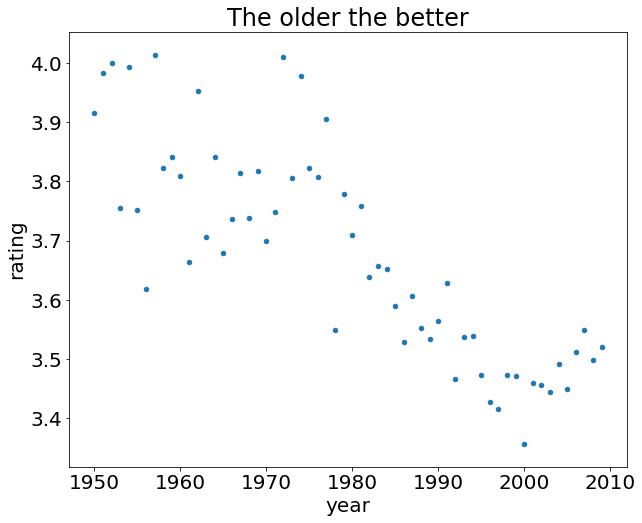

In [108]:
rating_year.filter(items=['year','rating']).plot(kind = 'scatter', x = 'year', y = 'rating', title = 'The older the better')
